<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Authors: Matt Brems (DC), Marc Harper (LA)_

---

<a id="learning-objectives"></a>
### Learning Objectives 
- Understand modeling, inference from models, and prediction
- Understand the framework of regression modeling
- Understand simple linear regression and linear relationships between variables
- Learn how to find the best slope and intercept for simple linear regression
- Be able to interpret the results of simple linear regression
- Understand the assumptions that simple linear regression makes

### Lesson Guide

- [Naive/Baseline Prediction](#naivebaseline-prediction)
- [Finding the "best" slope and intercept](#finding-the-best-slope-and-intercept)
- [Interpretation of SLR](#interpretation-of-slr)
- [Assumptions of SLR](#assumptions-of-slr)
- [Final notes on linear regression](#final-notes-on-linear-regression)
	- [Categorical predictors](#categorical-predictors)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id="naivebaseline-prediction"></a>
## Naive/Baseline Prediction

What is the best prediction we can make for any data point if we can only use a single value?

How can we measure the success of our prediction?

<a id="lets-generate-some-data"></a>
### Let's generate some data

In [2]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))

In [3]:
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,-5.000000,50.124649
1,-4.444444,52.084380
2,-3.888889,37.026738
3,-3.333333,71.263412
4,-2.777778,68.985573


If we know very little about our data and can only use a single value, we can still predict the mean.

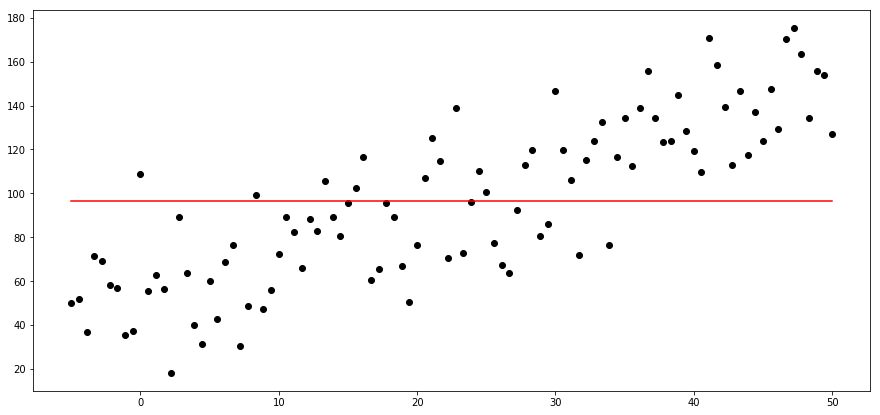

In [4]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

We'll add that prediction to our DataFrame to use later

In [5]:
df['Mean_Yhat'] = df['Y'].mean()

In [6]:
df.head()

,X,Y,Mean_Yhat
0,-5.000000,50.124649,96.310956
1,-4.444444,52.084380,96.310956
2,-3.888889,37.026738,96.310956
3,-3.333333,71.263412,96.310956
4,-2.777778,68.985573,96.310956


<a id="finding-the-best-slope-and-intercept"></a>
## Finding the "best" slope and intercept

---

**1. If we want to find the "best" slope an intercept, we will need a criterion that defines what it means to be the "best".**

**2. We need to be able to numerically optimize (maximize or minimize) this criterion.**


<a id="residuals"></a>
### Residuals

The difference between the true value of $Y$ and the predicted value of $Y$ (denoted $\hat{Y}$, "Y-hat") is known as a "residual." For every value of $\hat{Y}_i$, there is an accompanying residual $\epsilon_i$.

**Note that the residual $\epsilon_i$ is the same as the error in our modeled linear relationship!**


<a id="residual-sum-of-squares-rss"></a>
### Residual sum of squares (RSS)

The most common way to define the "best fit line" is one that forces the ensures our residuals (a.k.a. errors) will be as close to zero as possible.

In fact, we see to minimize the *sum of squared residuals* or [residual sum of squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares). This minimizes the [mean squared error (MSE) or sum of squares of error (SSE)](https://en.wikipedia.org/wiki/Mean_squared_error).

### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

This is also known as a **loss function**, where the "loss" here is the sum of squared residuals.

---

**Review: what is the difference between a parameter and a statistic?**

Below are two equations, one using parameters and one using statistics. What is the difference?

### $$ Y = \beta_0 + \beta_1 X \\
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X $$

In [7]:
# Parameters represent the values in the true populations
# Statistics are our estimation of the true parameters from the sample

Remember our naive prediction? Let's see how it does.

In [8]:
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

1379.102582536487

<a id="minimizing-the-mse"></a>
### Minimizing the MSE

For simple linear regression [we can derive the intercept and slope that minimize the RSS algebraically](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line). 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept and slope that minimize the RSS is:

### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$

Our simple linear regression is an **estimator of the expected value (mean) of $Y$**.

> **Note:** Estimators are mathematical functions or formulas that yield an *estimate*. For example, an estimator might be the sample mean whereas the estimate is the value of the sample mean from our data set.

<a id="calculate-beta-coefficients-by-hand"></a>
### Calculate beta coefficients by hand

In [9]:
y_bar = df['Y'].mean()
x_bar = df['X'].mean()
std_y = df['Y'].std()
std_x = df['X'].std()
r_xy = df.corr().loc['X','Y']
beta_1 = r_xy*(std_y/std_x)
beta_0 = y_bar - beta_1*x_bar

In [10]:
df['Linear_Yhat'] = beta_0 + beta_1*df['X']

In [11]:
np.square(df['Y'] - df['Linear_Yhat']).mean()

434.9689021101697

**How does our new MSE compare to our old MSE?**

In [12]:
# Our new MSE is much smaller. This means that on average our residuals are smaller and we have a better fit.

#### We can now plot our line

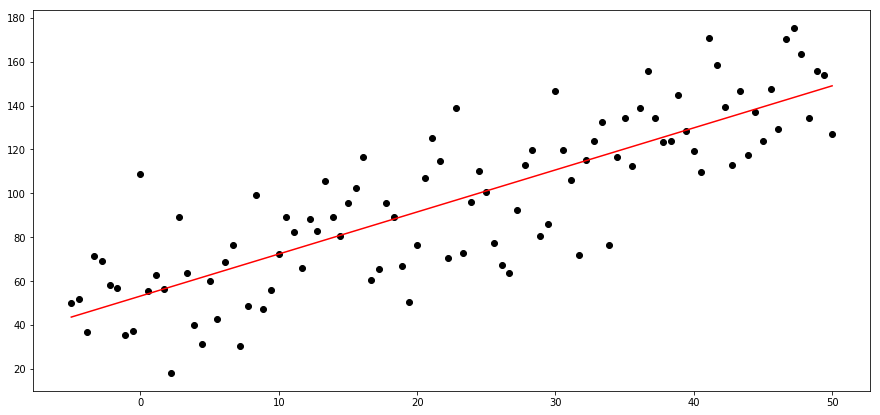

In [13]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='r');

#### We can also plot our residuals

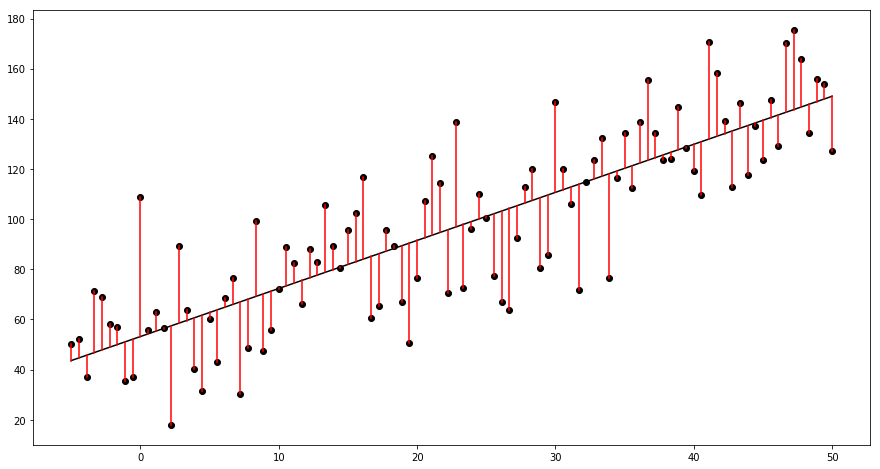

In [14]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

<a id="interpretation-of-slr"></a>
## Interpretation of SLR

---

The simple linear regression estimators described above have really nice properties:

1. They are unbiased. (a.k.a. the statistics will on average equal the true parameter value)
2. Among all unbiased estimators, the estimators above have the smallest possible variance.
3. They are consistent. (a.k.a. as your sample size n goes to infinity, the statistic converges to the true parameter value)

**However, these are just mathematical properties.** They do not take into account real-world situations. For example, suppose I want to use a SLR model to predict my commute time and I get the model:

    [commute time] = 8 * [number of Metro stops] - 10

In this case, my commute time is estimated to be negative if I go zero stops or one stop on the Metro. If I were to interpret my intercept, I might say "If I travel zero Metro stops on my way to work, I expect to commute -10 minutes." Of course, this is nonsense; you can't have a negative commute time!

**What this means:** 

When building a model, make sure your model makes sense! You are responsible for the interpretation of the model. All the computer will do is optimize. You may not do anything wrong when you fit a model, but make a note that there are  shortcomings to the framework.

<a id='assumptions'></a>

<a id="assumptions-of-slr"></a>
## Assumptions of SLR

---

There are some critical assumptions involved in SLR that you must be aware of:

1. **Linearity:** Y and X must have an approximately linear relationship.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any i != j.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is a useful way to remember these four assumptions.

Lengthier discussions of the four main assumptions and how one can evaluate or test for each of these [can be found here](http://people.duke.edu/~rnau/testing.htm).

If all four assumptions are true, the following holds: 

### $$ Y_i \text{ ~ } N(\beta_0 + \beta_1 X_i, \sigma) $$

# Multiple Linear Regression

<a id='load-data'></a>

## Load the real estate data

---

Over the course of this lesson we will be constructing a simple linear regression and then extend this to multiple linear regression. Included in the datasets folder is a very simple dataset on real estate prices.

**Load the data using pandas.**

In [18]:
house_csv = '../../data/housing-data.csv'

house = pd.read_csv(house_csv)
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


The columns are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
**Convert `price` to be in units of 1000 (thousands of dollars).**

In [19]:
house['price'] = house.price.map(lambda x: x/1000.)
house.head(2)

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9


<a id='slr-to-mlr'></a>

## From simple linear regression (SLR) to multiple linear regression (MLR)

---

The TL;DF of multiple linear regression:

> Instead of using just one predictor to estimate a continuous target, we build a model with multiple predictor variables. You will be using MLR way more than SLR going forward.

These variables will be represented as columns in a matrix (often a pandas dataframe).

**Brainstorm some examples of real-world scenarios where multiple predictors would be beneficial. Can you think of cases where it might be detrimental?**

In [20]:
# If Y is a function of multiple things then it makes sense to expand the equation
# For example: predicting the weather tomorrow from pressure and temperature instead of just one of them
# MLR could be detrimental if the predictors we are including aren't relevant. Why
# include predictors in our formula that do not have a real impact: more on this later!

<a id='assumptions'></a>

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

The mnemonic LINEI is a useful way to remember these five assumptions.

<a id='fit-mlr'></a>

## Fitting a multiple linear regression

---

The formula for computing the $\beta$ values in multiple regression is best done using linear algebra. We will cover the derivation, but for more depth  [these slides are a great resource](http://statweb.stanford.edu/~nzhang/191_web/lecture4_handout.pdf).

$X$ is now a _matrix_ of predictors $x_1$ through $x_i$ (with each column a predictor), and $y$ is the target vector we are seeking to estimate. There is still only 1 *estimated* variable!

### $$ \hat{y} = X \beta$$

**Note:** $\beta$ in the formula above is a *vector* of coefficients now, rather than a single value.

In different notation we could write $\hat{y}$ calculated with:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

---

<a id='mlr-beta-derivation'></a>

### Deriving the $\beta$ coefficients

$\beta$ is solved with the linear algebra formula:

### $$ \beta = (X'X)^{-1}X'y $$

Where $X'$ is the transposed matrix of original matrix $X$ and $(X'X)^-1$ is the inverted matrix of $X'X$.



The equation using true $y$ is:

### $$ y = X \beta + \epsilon $$

Again, $\epsilon$ is our vector of errors, or residuals.

We can equivalently formulate this as in terms of the residuals:

### $$ \epsilon = X \beta - y $$

Our goal is to minimize the sum of squared residuals. The sum of squared residuals is equivalent to the dot product of the vector of residuals:

### $$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon' \epsilon
$$

Therefore we can write the sum of squared residuals as:

### $$ \epsilon' \epsilon = (X \beta - y)' (X \beta - y) $$

Which becomes:

### $$ \epsilon' \epsilon = y'y - y'X\beta - \beta' X' y + \beta' X' X \beta $$

Now take the derivative with respect to $\beta$:

### $$ \frac{\partial \epsilon' \epsilon}{\partial \beta} = 
-2X'y + 2X'X\beta$$

We want to minimize the sum of squared errors, and so we set the derivative to zero and solve for the beta coefficient vector:

### $$ 0 = -2X'y + 2X'X\beta \\
X'X\beta = X'y \\
\beta = (X'X)^{-1}X'y$$

<a id='code-mlr'></a>

### Code a MLR

**First, we need to create the "design matrix" of our predictors.**

The first column will be a column of all 1s (the intercept) and the other columns will be `sqft`, `bdrms`, and `age`.

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix using with `.values`.

In [21]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9
2,2400,3,44,369.0
3,1416,2,49,232.0
4,3000,4,75,539.9


In [22]:
X = house[['sqft', 'bdrms', 'age']]
X['intercept'] = 1.
# reordering columns:
X = X[['intercept', 'sqft', 'bdrms', 'age']].values
print(X[0:3, :])

[[1.000e+00 2.104e+03 3.000e+00 7.000e+01]
 [1.000e+00 1.600e+03 3.000e+00 2.800e+01]
 [1.000e+00 2.400e+03 3.000e+00 4.400e+01]]


### Solve for the beta coefficients

We are still predicting `price`. Implement the linear algebra equation to solve for the beta coefficients. 

### $$ \beta = (X'X)^{-1}X'y $$

**Tips:**

The transpose of a matrix is calculated by appending `.T` to the matrix:

    X.T

Matrices multipled in the formula should be done with the "dot product":

    np.dot(mat1, mat2)

Inverting a matrix is done using:

    np.linalg.inv()

In [23]:
price = house.price.values
beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), price)
print(beta_vec)

[ 9.24516278e+01  1.39334847e-01 -8.62147046e+00 -8.12178776e-02]


**Confirm that these betas are the same as the ones using `sklearn.linear_model.LinearRegression`**

```python
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print linreg.coef_
```

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print(linreg.coef_)

[ 9.24516278e+01  1.39334847e-01 -8.62147046e+00 -8.12178776e-02]


**Calculate predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.**

In [25]:
yhat = np.dot(X, beta_vec)

**Calculate the RMSE of the multiple regression model.**

In [26]:
print('Multiple regression MSE:', np.sqrt(np.mean(np.square(price - yhat))))

Multiple regression MSE: 63.89999361363429


<a id='additional-resources'></a>

## Additional resources

---

[Maximum likelihood estimation](https://onlinecourses.science.psu.edu/stat504/node/28)